# Airbnb Data Playbook for Istanbul

## Business Understanding

Airbnb is an online marketplace to arrange or offer places to stay for a short term. Airbnb’s accommodation marketplace provides access to 6+ million unique places to stay in 100,000+ cities and 191 countries and regions. It practically offers a lodging when you want to visit a place with a taste of local atmosphere and not compromising the house comfort.

Airbnb has mainly 2 customer profiles: the people who wants to stay in a place for a short time and the people who offers places to stay. In this project, we are going to focus on the 2nd profile to solve one particular problem and give some guidance them related to the properties of the place.

One of the main problems of the customers is that it is very difficult to decide price for a new place because Airbnb does not provide a guidance how to choose relevant price for a place and there is a high competition on the online marketplace. If you set up the price to a high value, then you might miss your potential customers, and if the otherwise happens then you are going to make less profit than you are actually able to do. And, this problem can be solved by the help of machine learning algorithms.


## Data Understanding

Different datasets grouped by the countries and cities are publicly provided by Inside Airbnb. For this project, we are going to use Istanbul Airbnb dataset which is compiled on 29 June 2019.

The dataset (listings.csv) has 19727 rows and 105 columns. And, it looks like it needs a handful of preprocessing operations.  

**listings.csv:**  
id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,  
notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,  
host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,  
host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,  
host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,  
neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,  
latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,  
amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,  
minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,  
maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,  
availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,  
number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,  
review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,  
license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,  
require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,  
calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,  
calculated_host_listings_count_shared_rooms,reviews_per_month



## Questions to answer
This notebook is going to be a living project with possibly adding new questions and trying to answer them.

**These are the questions that I'm gonna investigate right now:**
- Is it possible to predict the price for a new listing?
- What are the most important features affecting the price?
- Which ones are the most expensive neighborhoods?

**And, the questions for the future:**
- Seasonal availability ratio for the listings/neighborhoods
- Neighborhoods getting the most reviews
- The most popular neighborhoods (winter & summer, availability)
- How positive is the reviewer?

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import datetime

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer

## Data Preparation

Let's have a look at the columns and check whether we have informative values or not.

In [2]:
listings = pd.read_csv('istanbul/listings.csv', index_col='id')
print(listings.shape)
listings.head(3)

(19727, 105)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (43,61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4826,https://www.airbnb.com/rooms/4826,20190629051244,2019-06-29,The Place,My place is close to great views. My place is ...,A double bed apartment on the Asian side of Is...,My place is close to great views. My place is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/15347/ba87...,NaN,6603,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey","Hello...\r\nI am Kaan and I am from Istanbul, ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,Üsküdar,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Üsküdar,Uskudar,NaN,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,41.05650,29.05367,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",700.0,$607.00,NaN,NaN,NaN,NaN,2,$150.00,1,730,1,1,730,730,1.0,730.0,26 months ago,t,30,60,90,365,2019-06-29,1,0,2009-06-01,2009-06-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,0.01
20815,https://www.airbnb.com/rooms/20815,20190629051244,2019-06-29,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill. A spa...,"The low green hills of Arnavutköy, the lovely,...",Watch The Bosphorus from The Comfy Hill. A spa...,none,"The lovely neighborhood, Arnavutkoy, is locate...",The house may be suited with extra inflatable ...,"The city center, Taksim is about 6-7 kilometer...",Our dear guests may enjoy the oven and the was...,"Depending on our time available, we may even t...",- Windows facing the street should not be left...,NaN,NaN,https://a0.muscache.com/im/pictures/94805791/4...,NaN,78838,https://www.airbnb.com/users/show/78838,Gülder,2010-02-08,"Ankara, Ankara, Turkey",Başar Family\r\n\r\nGülder (mother): Owner of ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/78838/profile...,https://a0.muscache.com/im/users/78838/profile...,Beşiktaş,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'wor...",t,f,"Istanbul, Turkey",Beşiktaş,Besiktas,NaN,Istanbul,NaN,34345,Istanbul,"Istanbul, Turkey",TR,Turkey,41.0698

We can drop the columns that have many NaN values, I've defined the threshold as 80%.

In [3]:
nan_columns = listings.columns[listings.isnull().sum() / len(listings) > 0.8 ]
listings.drop(nan_columns,axis=1,inplace=True)
listings.shape

(19727, 95)

In [4]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19727 entries, 4826 to 36183972
Data columns (total 95 columns):
listing_url                                     19727 non-null object
scrape_id                                       19727 non-null int64
last_scraped                                    19727 non-null object
name                                            19646 non-null object
summary                                         17389 non-null object
space                                           10779 non-null object
description                                     18240 non-null object
experiences_offered                             19727 non-null object
neighborhood_overview                           9133 non-null object
notes                                           4761 non-null object
transit                                         8526 non-null object
access                                          6925 non-null object
interaction                                     78

Seems like we have many object datatyped columns.  
We need to investigate these columns to understand whether they carry useful information or not.

In [5]:
objects = listings.columns[listings.dtypes == object]
print(objects)
listings[objects].head(1)

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'requires_license', 'instant_bookable', 'is_business_travel_ready

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4826,https://www.airbnb.com/rooms/4826,2019-06-29,The Place,My place is close to great views. My place is ...,A double bed apartment on the Asian side of Is...,My place is close to great views. My place is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/15347/ba87...,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey","Hello...\r\nI am Kaan and I am from Istanbul, ...",NaN,NaN,f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,Üsküdar,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Üsküdar,Uskudar,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,f,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",$607.00,NaN,NaN,$150.00,26 months ago,t,2019-06-29,2009-06-01,2009-06-01,f,f,f,flexible,f,f


We can remove the columns that have same value for the entire dataset.  

In [6]:
listings.is_business_travel_ready.value_counts()

f    19727
Name: is_business_travel_ready, dtype: int64

In [7]:
same_valued_columns = ['is_business_travel_ready', 'country_code','country', 
                       'has_availability', 'calendar_last_scraped','requires_license',
                       'experiences_offered','last_scraped','require_guest_phone_verification',
                       'require_guest_profile_picture','host_has_profile_pic','scrape_id']
listings.drop(same_valued_columns,axis=1,inplace=True)


And, the columns that have inconsistent values.

In [8]:
listings.market.value_counts()

Istanbul                 19553
Other (International)      171
Marmara                      3
Name: market, dtype: int64

In [9]:
inconsistent_valued_columns = ['city', 'state','street','neighbourhood','market']
listings.drop(inconsistent_valued_columns,axis=1,inplace=True)

listings.shape

(19727, 78)

In [10]:
removed_columns = same_valued_columns + inconsistent_valued_columns
objects = list(set(objects) - set(removed_columns))
objects

['host_verifications',
 'instant_bookable',
 'house_rules',
 'interaction',
 'description',
 'bed_type',
 'host_about',
 'notes',
 'neighbourhood_cleansed',
 'extra_people',
 'host_thumbnail_url',
 'host_since',
 'space',
 'host_url',
 'host_location',
 'host_response_rate',
 'host_is_superhost',
 'cleaning_fee',
 'listing_url',
 'first_review',
 'host_response_time',
 'host_neighbourhood',
 'summary',
 'security_deposit',
 'transit',
 'price',
 'host_name',
 'last_review',
 'neighborhood_overview',
 'host_identity_verified',
 'property_type',
 'cancellation_policy',
 'zipcode',
 'calendar_updated',
 'host_picture_url',
 'is_location_exact',
 'name',
 'room_type',
 'smart_location',
 'amenities',
 'picture_url',
 'access']

From the above list we can see that there are some columns with wrong datatypes like `price` which should have numerical datatype.

Some of them doesn't seem useful at all like urls, so we can just drop them. And, some of them might be useful like `notes` and `transit` explanation that people might find necessary info in these parts that affects their decisions. But, for simplicity we can drop them as well.

Some columns definitely need extra analysis and processing.
 

In [11]:
wrong_datatyped = ['cleaning_fee','security_deposit','price','extra_people']
not_useful_columns = ['host_thumbnail_url','picture_url','host_picture_url','host_url','listing_url','host_id']
maybe_useful_columns = ['host_about', 'house_rules', 'summary', 'description', 'name', 'notes', 'transit', 'neighborhood_overview', 'host_name', 'interaction', 'zipcode', 'space', 'host_location', 'access', 'smart_location', 'host_neighbourhood']
boolean_columns = ['host_identity_verified', 'is_location_exact', 'instant_bookable', 'host_is_superhost']
extra_processing = ['host_response_rate', 'property_type', 'calendar_updated', 'host_verifications', 'neighbourhood_cleansed', 'amenities', 'room_type', 'cancellation_policy', 'host_response_time', 'bed_type', 'last_review','host_since','first_review']


In [12]:
listings.drop(not_useful_columns,axis=1,inplace=True)
listings.drop(maybe_useful_columns,axis=1,inplace=True)

listings.shape

(19727, 56)

We can leave `wrong_datatyped` columns for now since these should be numerical columns, and we can deal with numerical processing later.

We can convert `boolean_columns` to numerical columns.

In [13]:
for column in boolean_columns:
    listings[column] = listings[column].apply(lambda x: 1 if x == 't' else 0)

In [18]:
cols_dropped = listings.copy()

And, start investigating `extra_processing` columns.

In [15]:
cols_dropped.host_response_rate.value_counts(normalize=True)

100%    0.670221
0%      0.064205
90%     0.035449
50%     0.023902
80%     0.021034
67%     0.016695
97%     0.014562
70%     0.010958
75%     0.010517
98%     0.009267
83%     0.009120
60%     0.009046
33%     0.008825
86%     0.007722
88%     0.006987
96%     0.006693
95%     0.006546
89%     0.006325
99%     0.006031
91%     0.005957
94%     0.004413
40%     0.004339
93%     0.004119
25%     0.003236
71%     0.003236
92%     0.002942
78%     0.002059
81%     0.001912
20%     0.001618
52%     0.001618
87%     0.001544
84%     0.001397
85%     0.001324
56%     0.001177
57%     0.001177
30%     0.001103
73%     0.001030
63%     0.000956
43%     0.000956
38%     0.000956
47%     0.000735
62%     0.000662
58%     0.000662
10%     0.000588
82%     0.000588
74%     0.000515
65%     0.000515
61%     0.000515
77%     0.000441
54%     0.000441
17%     0.000441
64%     0.000368
27%     0.000294
79%     0.000294
46%     0.000221
29%     0.000221
14%     0.000221
44%     0.000221
69%     0.0001

`host_response_rate` might be an important feature, values are pretty granular in the dataset. We can convert these values into rough ones to make the categories much more obvious.


In [19]:
cols_dropped.host_response_rate = cols_dropped.host_response_rate.str[:-1].astype('float64')
cols_dropped.host_response_rate = pd.cut(cols_dropped.host_response_rate, bins=[0, 80, 99, 100], labels=['0-79%', '80-99%', '100%'], include_lowest=True)
cols_dropped.host_response_rate = cols_dropped.host_response_rate.astype('str')
cols_dropped.host_response_rate.replace('nan', 'unknown', inplace=True)


In [20]:
cols_dropped.host_response_rate.value_counts(normalize=True)

100%       0.461956
unknown    0.310742
0-79%      0.135702
80-99%     0.091600
Name: host_response_rate, dtype: float64

In [21]:
cols_dropped.property_type.value_counts(normalize=True)

Apartment                 0.607391
Serviced apartment        0.111725
House                     0.054443
Boutique hotel            0.042987
Bed and breakfast         0.042125
Aparthotel                0.023268
Condominium               0.021341
Townhouse                 0.020023
Hotel                     0.018249
Loft                      0.017286
Villa                     0.011862
Hostel                    0.008212
Casa particular (Cuba)    0.006184
Other                     0.004512
Guesthouse                0.001571
Tiny house                0.001369
Guest suite               0.001014
Earth house               0.000760
Farm stay                 0.000659
Cottage                   0.000558
Nature lodge              0.000558
Boat                      0.000558
Yurt                      0.000406
Treehouse                 0.000406
Castle                    0.000355
Lighthouse                0.000304
Camper/RV                 0.000253
Chalet                    0.000253
Bungalow            

Same situation for `property_type`, it carries very granular types. We can merge these types into rough ones and merge the rest to the `other` type.


In [22]:
cols_dropped.property_type.replace({
    'Bed and breakfast': 'Hotel',
    'Serviced apartment': 'Hotel', 
    'Boutique hotel': 'Hotel',
    'Aparthotel': 'Hotel',
    'Townhouse': 'House',
    'Loft': 'Apartment',
    'Villa': 'House',
    'Tiny house': 'House',
    'Condominium': 'Apartment',
    'Guest suite': 'Apartment',
    'Earth house': 'House',
    'Cottage': 'House',
    'Bungalow': 'House',
    'Chalet': 'House' 
    }, inplace=True)
     
cols_dropped.loc[~cols_dropped.property_type.isin(['Hotel', 'House', 'Apartment']), 'property_type'] = 'Other'

In [23]:
cols_dropped.property_type.value_counts(normalize=True)

Apartment    0.647032
Hotel        0.238354
House        0.089522
Other        0.025093
Name: property_type, dtype: float64

In [24]:
cols_dropped.calendar_updated.value_counts()[:5]

today           2507
2 weeks ago     1225
2 months ago    1193
a week ago       973
3 months ago     820
Name: calendar_updated, dtype: int64

`calendar_updated` has 102 different values, and I'm not sure if this column actually affects people's decision. For simplicity, I'll drop it.

Same goes for `host_verifications`, it has 274 different values as array type having different string values in it.

In [25]:
cols_dropped.host_verifications.value_counts()[:5]

['email', 'phone']                                         5603
['email', 'phone', 'reviews']                              1220
['phone']                                                  1156
['email', 'phone', 'reviews', 'jumio', 'government_id']    1090
['email', 'phone', 'facebook']                              832
Name: host_verifications, dtype: int64

In [26]:
cols_dropped.drop('calendar_updated',axis=1,inplace=True)
cols_dropped.drop('host_verifications',axis=1,inplace=True)

In [28]:
cols_dropped.neighbourhood_cleansed.value_counts()

Beyoglu          5222
Sisli            2822
Fatih            2570
Kadikoy          2037
Besiktas         1631
Uskudar           703
Esenyurt          477
Kagithane         466
Sariyer           338
Atasehir          312
Maltepe           298
Bakirkoy          259
Bahcelievler      207
Basaksehir        204
Umraniye          175
Adalar            173
Eyup              172
Pendik            167
Kartal            149
Avcilar           148
Kucukcekmece      147
Bagcilar          127
Buyukcekmece      108
Zeytinburnu       101
Beykoz            101
Sile               97
Beylikduzu         83
Tuzla              70
Gaziosmanpasa      69
Gungoren           64
Cekmekoy           46
Silivri            41
Sancaktepe         35
Bayrampasa         22
Arnavutkoy         21
Sultanbeyli        19
Sultangazi         19
Esenler            19
Catalca             8
Name: neighbourhood_cleansed, dtype: int64

I think `neighbourhood_cleansed` should have an important affect to people's decision, I'm gonna keep it as it is. But, we can merge some neighborhoods based on the EDA later.


`amenities` carries useful information as string arrays. We need to extract the values into separate columns.

In [29]:
amenities = set()
unique_amenities = cols_dropped.amenities.unique()

for item in unique_amenities:
    items = item[1:-1].replace('"','').split(',')
    for x in items:
        if x:
            amenities.add(x.strip())

for item in amenities:
    cols_dropped.loc[listings['amenities'].str.contains(item), item] = 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # This is added back by InteractiveShellApp.init_path()


After extracting values into columns, we have many columns carrying more than 80% NaN values. We'll clean them first and then drop original `amenities` column.

In [30]:
nan_columns = cols_dropped.columns[cols_dropped.isnull().sum() / len(listings) > 0.8 ]
cols_dropped.drop(nan_columns,axis=1,inplace=True)

cols_dropped.drop('amenities',axis=1,inplace=True)

cols_dropped.shape

(19727, 86)

In [31]:
cols_dropped.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores

In [33]:
amenities_columns = ['Luggage dropoff allowed','Carbon monoxide detector', 'Washer', 'Bed linens', 'Cable TV','Laptop friendly workspace', 'Fire extinguisher', 'First aid kit','Kitchen', 'Refrigerator', 'Pets allowed', 'Long term stays allowed','Smoke detector', 'Host greets you', 'Hot water', 'TV', 'Hair dryer','Heating', 'Family/kid friendly', 'Free parking on premises', 'Shampoo','Essentials', 'Smoking allowed', 'Lock on bedroom door', 'Dryer','Air conditioning', 'Breakfast', 'Internet', 'Cooking basics', 'Iron','Wifi', 'Elevator', 'Hangers']
cols_dropped[amenities_columns] = cols_dropped[amenities_columns].fillna(0)


We can drop the columns that have over 80% the same value.

In [67]:
cols_dropped['Internet'].value_counts(normalize=True)

0.0    0.782684
1.0    0.217316
Name: Internet, dtype: float64

In [68]:
drop_amenities = ['Carbon monoxide detector','Kitchen','Essentials','Breakfast','Wifi','Internet','Heating']
cols_dropped.drop(drop_amenities,axis=1,inplace=True)
cols_dropped.shape


(19727, 79)

In [69]:
cols_dropped.room_type.value_counts(normalize=True)

Private room       0.495767
Entire home/apt    0.475795
Shared room        0.028438
Name: room_type, dtype: float64

No need further processing for `room_type`.

In [70]:
cols_dropped.host_response_time.value_counts(normalize=True)

within an hour        0.611753
within a few hours    0.163051
within a day          0.136574
a few days or more    0.088622
Name: host_response_time, dtype: float64

Just filling in NaN values for `host_response_time`.

In [71]:
cols_dropped.host_response_time = cols_dropped.host_response_time.fillna('a few days or more')

In [72]:
cols_dropped.cancellation_policy.value_counts(normalize=True)

flexible                       0.628403
strict_14_with_grace_period    0.189424
moderate                       0.181463
super_strict_30                0.000659
strict                         0.000051
Name: cancellation_policy, dtype: float64

We can keep 3 categories for `cancellation_policy` as strict, flexible and moderate.

In [73]:
cols_dropped.cancellation_policy.replace({
    'super_strict_30': 'strict',
    'strict_14_with_grace_period': 'strict'
    }, inplace=True)
     
cols_dropped.cancellation_policy.value_counts(normalize=True)

flexible    0.628403
strict      0.190133
moderate    0.181463
Name: cancellation_policy, dtype: float64

`cancellatin_policy` is probably 'flexible' since they have not cared to define and it is also median value, so I'm gonna fill in NaN values with 'flexible' value.

In [74]:
cols_dropped.cancellation_policy = cols_dropped.cancellation_policy.fillna('flexible')

In [75]:
cols_dropped.bed_type.value_counts()

Real Bed         19518
Pull-out Sofa      129
Couch               60
Airbed              12
Futon                8
Name: bed_type, dtype: int64

In [76]:
cols_dropped.drop('bed_type',axis=1,inplace=True)

And, the rest are related to the date columns: `'last_review','host_since','first_review'`. We can convert these columns into numerical values to specify how many days passed till the date which the dataset had been generated (29/06/2019).

In [77]:
date_columns = ['last_review','host_since','first_review']

for column in date_columns:
    cols_dropped[column] = pd.to_datetime(cols_dropped[column])
    cols_dropped[column + '_diff'] = (datetime(2019, 6, 29) - cols_dropped[column]).astype('timedelta64[D]')

cols_dropped.drop(date_columns, axis=1, inplace=True)

In [78]:
cols_dropped.columns[cols_dropped.dtypes == 'object']

Index(['host_response_time', 'host_response_rate', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'price', 'security_deposit',
       'cleaning_fee', 'extra_people', 'cancellation_policy'],
      dtype='object')

From the above list, we can see that we've cleaned the object data typed columns mostly. Now we can deal with `wrong_datatyped` columns. These are all price columns, so we need to convert them into numerical data types.

In [79]:
for column in wrong_datatyped:
    cols_dropped[column] = [x if pd.isna(x) else int(x.replace(',','')) for x in [x if pd.isna(x) else x[1:-3] for x in cols_dropped[column]]]
    

In [173]:
objects_processed = cols_dropped.copy()

In [81]:
objects_processed.columns[objects_processed.dtypes != 'object']

Index(['host_is_superhost', 'host_listings_count', 'host_total_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'is_location_exact',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_ho

Some of the numerical columns look suspicious as they can carry the same data as a group.
Now, I'm gonna investigate these columns.

In [176]:
listings_count = ['host_listings_count', 'host_total_listings_count','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
min_max_nights = ['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm']
availabilities = ['availability_30', 'availability_60','availability_90', 'availability_365']
reviews = ['number_of_reviews','number_of_reviews_ltm', 'reviews_per_month']


In [83]:
len(objects_processed[objects_processed.host_listings_count != objects_processed.host_total_listings_count])

27

Yep, seems like these columns carry the same info.

And, if we can sum the values of `'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
'calculated_host_listings_count_shared_rooms'` we can get `'calculated_host_listings_count'`. So no need to keep at granular level.  



In [84]:
len(objects_processed[objects_processed.host_listings_count !=  (objects_processed.calculated_host_listings_count_entire_homes + objects_processed.calculated_host_listings_count_private_rooms + objects_processed.calculated_host_listings_count_shared_rooms)])


2705

In [177]:
listings_count.remove('host_listings_count')
objects_processed.drop(listings_count, axis=1, inplace=True)


In [86]:
print(len(objects_processed[objects_processed.minimum_nights != objects_processed.minimum_minimum_nights]))
print(len(objects_processed[objects_processed.minimum_nights != objects_processed.minimum_maximum_nights]))
print(len(objects_processed[objects_processed.minimum_nights != objects_processed.minimum_nights_avg_ntm]))
print(len(objects_processed[objects_processed.maximum_nights != objects_processed.maximum_minimum_nights]))
print(len(objects_processed[objects_processed.maximum_nights != objects_processed.maximum_maximum_nights]))
print(len(objects_processed[objects_processed.maximum_nights != objects_processed.maximum_nights_avg_ntm]))


370
19600
870
19569
23
32


In [87]:
objects_processed[objects_processed.minimum_nights != objects_processed.minimum_maximum_nights][['minimum_nights','minimum_maximum_nights']][:5]


,minimum_nights,minimum_maximum_nights
id,,
4826,1,730
20815,30,210
25436,21,1125
27271,20,60
28277,3,360


In [88]:
objects_processed[objects_processed.maximum_nights != objects_processed.maximum_minimum_nights][['maximum_nights','maximum_minimum_nights']][:5]


,maximum_nights,maximum_minimum_nights
id,,
4826,730,1
20815,210,30
25436,1125,21
27271,60,20
28277,360,3


We can definitely remove `'minimum_minimum_nights','minimum_nights_avg_ntm','maximum_maximum_nights','maximum_nights_avg_ntm'`.

I'm not sure if we need to keep `'minimum_maximum_nights','maximum_minimum_nights'`, but I'm gonna keep them for now.

In [178]:
objects_processed.drop(['minimum_minimum_nights','minimum_nights_avg_ntm','maximum_maximum_nights','maximum_nights_avg_ntm'],axis=1,inplace=True)


In [90]:
objects_processed.availability_30[:5]

id
4826     30
20815     0
25436     0
27271     0
28277    27
Name: availability_30, dtype: int64

In [91]:
objects_processed.review_scores_value[:5]

id
4826      NaN
20815     9.0
25436     NaN
27271    10.0
28277     NaN
Name: review_scores_value, dtype: float64

`availabilities` group shows the availability of a listing within 30, 60, 90 and 365 days.  
`reviews` shows total number of reviews, the number of reviews in the last twelve months and per month review counts.  
These might be important, I'm gonna keep them.

In [92]:
objects_processed.shape

(19727, 69)

Now, we can investigate numerical columns thoroughly. Let's check the columns with na values.

In [93]:
nums = objects_processed.columns[objects_processed.isnull().sum() > 0]

set(nums) - set(objects_processed.columns[objects_processed.dtypes == 'object'])

{'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'first_review_diff',
 'host_listings_count',
 'host_since_diff',
 'last_review_diff',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'reviews_per_month',
 'security_deposit'}

For price columns, if they are null probably they should have 0 values.

In [179]:
objects_processed[['security_deposit', 'cleaning_fee']] = objects_processed[['security_deposit', 'cleaning_fee']].fillna(0)        
        

I think `'bathrooms','bedrooms','beds'` also should have 0 values for NaN values.

In [95]:
objects_processed[['bathrooms','bedrooms','beds']].isnull().sum()

bathrooms     91
bedrooms      21
beds         223
dtype: int64

In [180]:
objects_processed[['bathrooms','bedrooms','beds']] = objects_processed[['bathrooms','bedrooms','beds']].fillna(0)        
        

For `first_review_diff` and `last_review_diff`, they are NaN because there is no review yet for the related listing. But, no review is also useful information since people can change their minds based on reviews. Maybe, we should keep them as categorical values.


In [97]:
sum(objects_processed[objects_processed.first_review_diff.isnull()]['number_of_reviews'] > 0)

0

In [98]:
sum(objects_processed[objects_processed.last_review_diff.isnull()]['number_of_reviews'] > 0)

0

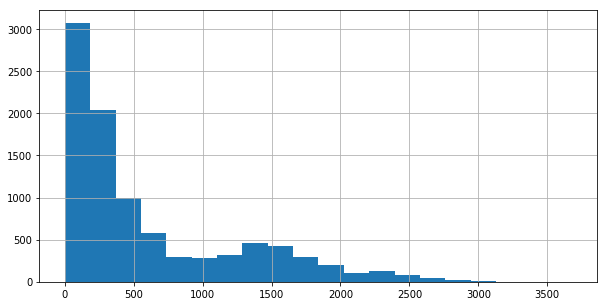

In [99]:
objects_processed.first_review_diff.hist(figsize=(10,5),bins=20)

In [181]:
objects_processed.first_review_diff = pd.cut(objects_processed.first_review_diff, bins=[0, 200, 500, 10000], labels=['<200','200-500','>=500'], right=False)
objects_processed.first_review_diff = objects_processed.first_review_diff.cat.add_categories(['unknown'])
objects_processed.first_review_diff.fillna('unknown',inplace=True)


In [120]:
objects_processed.first_review_diff.value_counts(normalize=True)

unknown    0.526182
>=500      0.173417
<200       0.162620
200-500    0.137781
Name: first_review_diff, dtype: float64

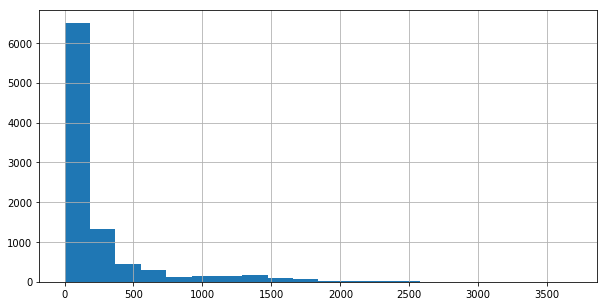

In [121]:
objects_processed.last_review_diff.hist(figsize=(10,5),bins=20)

In [182]:
objects_processed.last_review_diff = pd.cut(objects_processed.last_review_diff, bins=[0, 100, 10000], labels=['<100', '>100'], right=False)
objects_processed.last_review_diff = objects_processed.last_review_diff.cat.add_categories(['unknown'])
objects_processed.last_review_diff.fillna('unknown',inplace=True)


In [183]:
objects_processed.last_review_diff.value_counts(normalize=True)

unknown    0.526182
<100       0.287829
>100       0.185989
Name: last_review_diff, dtype: float64

We can fill NaN values with median ones for `host_since_diff` and `host_listings_count`.

In [135]:
print(len(objects_processed[objects_processed.host_since_diff.isnull()]))
print(len(objects_processed[objects_processed.host_listings_count.isnull()]))

27
27


In [184]:
median_cols = ['host_listings_count','host_since_diff']
    
for column in median_cols:
    median_value=objects_processed[column].median()
    objects_processed[column]=objects_processed[column].fillna(median_value)
    

For review columns, I suspect there might be correlation within these columns. Let's check this correlation first.

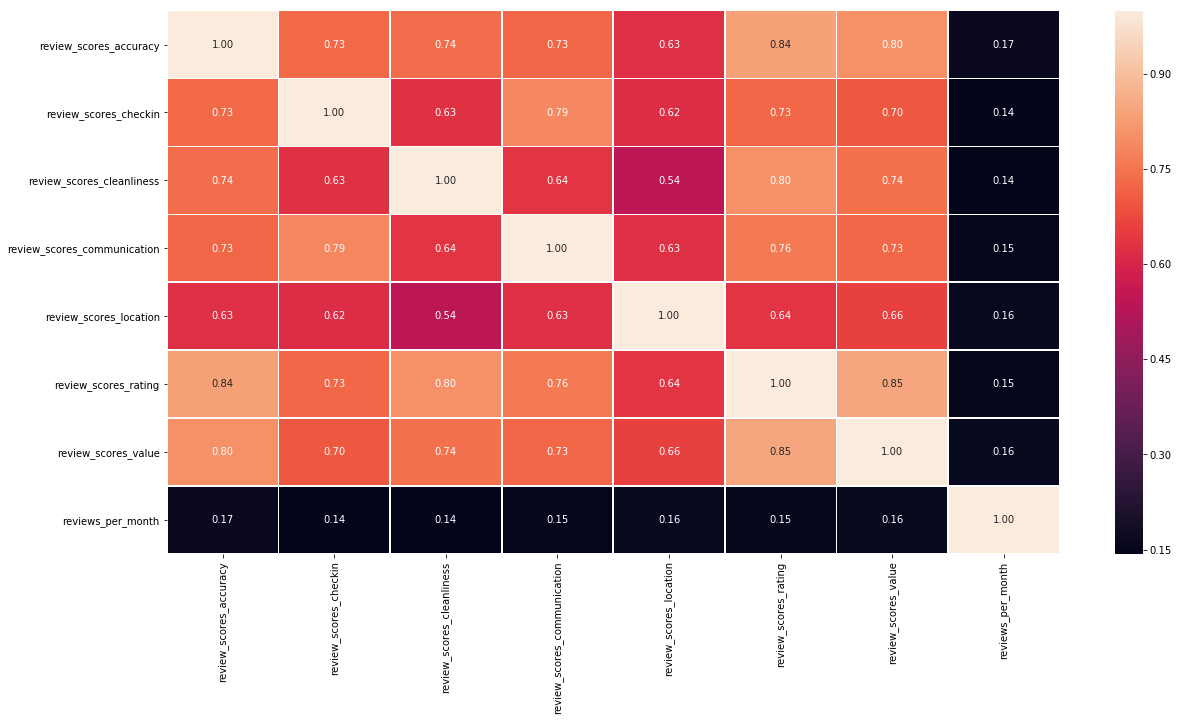

In [137]:
reviews = ['review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_location','review_scores_rating','review_scores_value','reviews_per_month']

plt.figure(figsize = (20,10))
sns.heatmap(objects_processed[reviews].corr(), annot=True, fmt='.2f', linewidths=.8) 



I'm gonna remove the columns that have over 79% correlation.

`review_scores_rating` is highly correlated with `'review_scores_accuracy','review_scores_cleanliness','review_scores_value'`.

And, `review_scores_communication` is highly correlated with `'review_scores_checkin'`



In [185]:
drop_revs = ['review_scores_accuracy','review_scores_cleanliness','review_scores_value','review_scores_checkin']

objects_processed.drop(drop_revs,axis=1,inplace=True)


For the rest, we can do category conversion as we did for the `'first_review_diff','last_review_diff'` since NaN values are also important for these columns: `'review_scores_communication','review_scores_location','review_scores_rating','reviews_per_month'`.


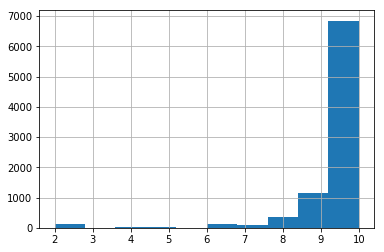

In [139]:
objects_processed.review_scores_communication.hist()

In [187]:
objects_processed.review_scores_communication = pd.cut(objects_processed.review_scores_communication, bins=[0, 10, 1000], labels=['<10', '10'], right=False)
objects_processed.review_scores_communication = objects_processed.review_scores_communication.cat.add_categories(['unknown'])
objects_processed.review_scores_communication.fillna('unknown',inplace=True)


In [154]:
objects_processed.review_scores_communication.value_counts(normalize=True)

unknown    0.554367
10         0.347138
<10        0.098494
Name: review_scores_communication, dtype: float64

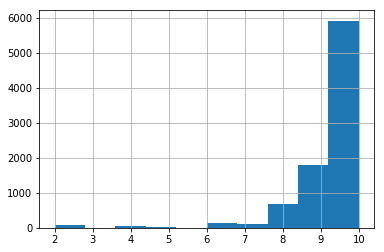

In [155]:
objects_processed.review_scores_location.hist()

In [188]:
objects_processed.review_scores_location = pd.cut(objects_processed.review_scores_location, bins=[0, 10, 1000], labels=['<10', '10'], right=False)
objects_processed.review_scores_location = objects_processed.review_scores_location.cat.add_categories(['unknown'])
objects_processed.review_scores_location.fillna('unknown',inplace=True)


In [159]:
objects_processed.review_scores_location.value_counts(normalize=True)

unknown    0.554671
10         0.299894
<10        0.145435
Name: review_scores_location, dtype: float64

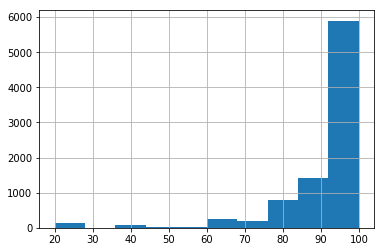

In [160]:
objects_processed.review_scores_rating.hist()

In [189]:
objects_processed.review_scores_rating = pd.cut(objects_processed.review_scores_rating, bins=[0, 90, 99, 1000], labels=['<90', '90-99', '100'], right=False)
objects_processed.review_scores_rating = objects_processed.review_scores_rating.cat.add_categories(['unknown'])
objects_processed.review_scores_rating.fillna('unknown',inplace=True)


In [190]:
objects_processed.review_scores_rating.value_counts(normalize=True)

unknown    0.553962
100        0.170781
90-99      0.162569
<90        0.112688
Name: review_scores_rating, dtype: float64

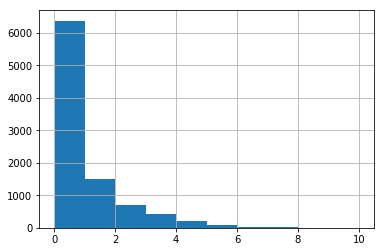

In [191]:
objects_processed.reviews_per_month.hist()

In [204]:
objects_processed.reviews_per_month = pd.cut(objects_processed.reviews_per_month, bins=[0, 1, 100], labels=['<1', '1-10'], right=False)
objects_processed.reviews_per_month = objects_processed.reviews_per_month.cat.add_categories(['unknown'])
objects_processed.reviews_per_month.fillna('unknown',inplace=True)


In [205]:
objects_processed.reviews_per_month.value_counts(normalize=True)

unknown    0.526182
<1         0.298271
1-10       0.175546
Name: reviews_per_month, dtype: float64

In [206]:
processed_listings = objects_processed.copy()

Now, we've cleaned all the NaN values, and we can check the statistical distributions for each column.

In [207]:
processed_listings.describe()

,host_is_superhost,host_listings_count,host_identity_verified,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,instant_bookable,Hangers,Air conditioning,Hair dryer,TV,Laptop friendly workspace,Elevator,Lock on bedroom door,Cable TV,Dryer,Washer,Refrigerator,Family/kid friendly,Iron,Smoke detector,Host greets you,Luggage dropoff allowed,Hot water,Bed linens,Fire extinguisher,First aid kit,Shampoo,Smoking allowed,Long term stays allowed,Cooking basics,Pets allowed,Free parking on premises,host_since_diff
count,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,1.972700e+04,19727.000000,1.972700e+04,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.00000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000,19727.000000
mean,0.076393,14.309576,0.190298,41.027520,28.984211,0.315253,3.105084,1.187966,1.354844,2.013585,377.366706,231.105338,45.284635,1.392508,28.110407,4.335885,1.098158e+05,4.593501,1.098156e+05,20.411872,43.538754,68.214376,243.167942,7.257616,3.631520,0.561768,0.757997,0.519542,0.764688,0.773965,0.671161,0.343793,0.427029,0.239722,0.31723,0.733614,0.254676,0.267400,0.694936,0.330359,0.231105,0.225022,0.490647,0.224058,0.381812,0.316521,0.753181,0.480965,0.232220,0.212399,0.253003,0.273483,1126.430375
std,0.265632,108.425903,0.392546,0.043559,0.118671,0.464628,2.222619,0.901195,1.407388,2.074018,1291.115797,1273.113740,108.414052,1.097863,61.834418,26.246753,1.528971e+07,28.135452,1.528971e+07,11.691232,21.897423,31.058530,135.189250,22.274279,9.969259,0.496183,0.428307,0.499631,0.424204,0.418273,0.469803,0.474985,0.494659,0.426925,0.46541,0.442080,0.435690,0.442614,0.460446,0.470354,0.421550,0.417607,0.499925,0.416971,0.485843,0.465130,0.431171,0.499650,0.422259,0.409016,0.434744,0.445758,817.006423
min,0.000000,0.000000,0.000000,40.813280,28.032000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,41.004830,28.973640,0.000000,2.000000,1.000000,1.000000,1.000000,116.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000e+01,1.000000,6.000000e+01,10.000000,29.000000,56.000000,99.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,335.000000
50%,0.000000,2.000000,0.000000,41.031740,28.984040,0.000000,2.000000,1.000000,1.000000,1.000000,208.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.125000e+03,1.000000,1.125000e+03,28.000000,57.000000,87.000000,324.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1131.000000
75%,0.000000,5.000000,0.

In [208]:
numerical_columns = list(set(processed_listings.columns) - set(amenities_columns))

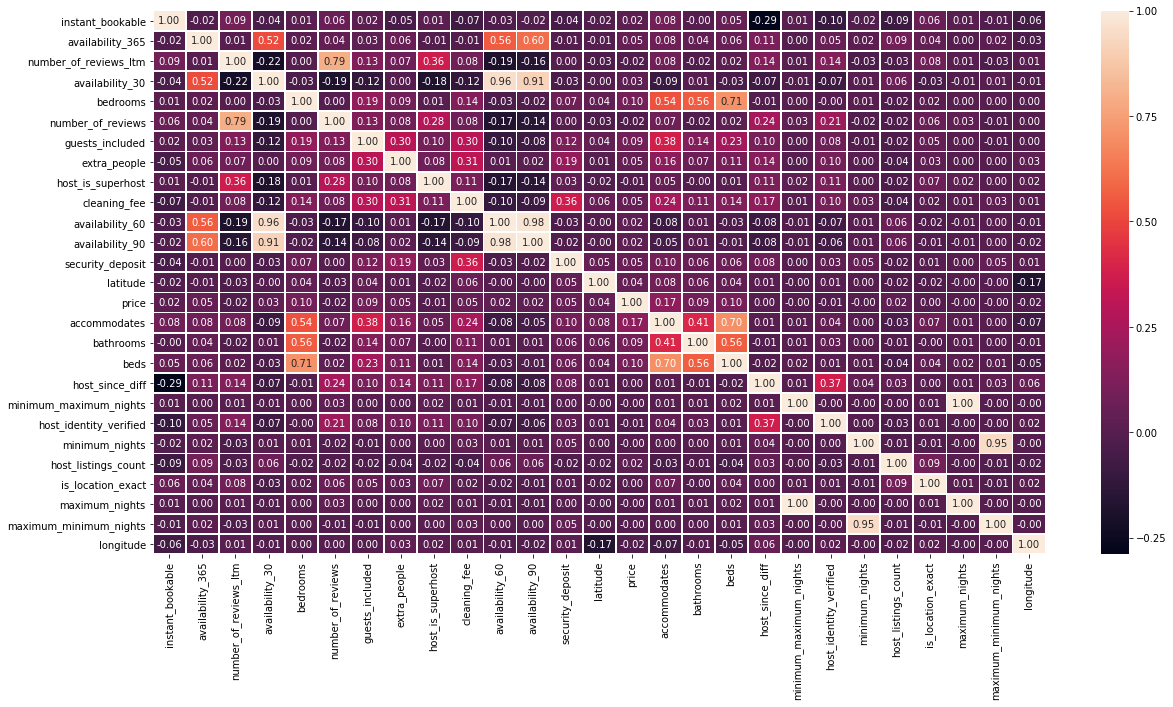

In [209]:
plt.figure(figsize = (20,10))
sns.heatmap(processed_listings[numerical_columns].corr(), annot=True, fmt='.2f', linewidths=.8)


Seems like for availabilities, we can just keep one of them, I'm gonna keep `availability_30`,
for number of reviews I'm gonna keep `number_of_reviews`, and for min/max nights I'm gonna keep `minimum_nights` & `maximum_nights`.


In [210]:
processed_listings.drop(['availability_60','availability_90'],axis=1,inplace=True)
processed_listings.drop('number_of_reviews_ltm',axis=1,inplace=True)
processed_listings.drop(['minimum_maximum_nights','maximum_minimum_nights'],axis=1,inplace=True)


In [220]:
numerical_columns = list(set(numerical_columns) - set(['availability_60','availability_90','minimum_maximum_nights','maximum_minimum_nights','number_of_reviews_ltm']))
plt.figure(figsize = (20,10))
sns.heatmap(processed_listings[numerical_columns].corr(), annot=True, fmt='.2f', linewidths=.8)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12538d4a8>,
      dtype=object)

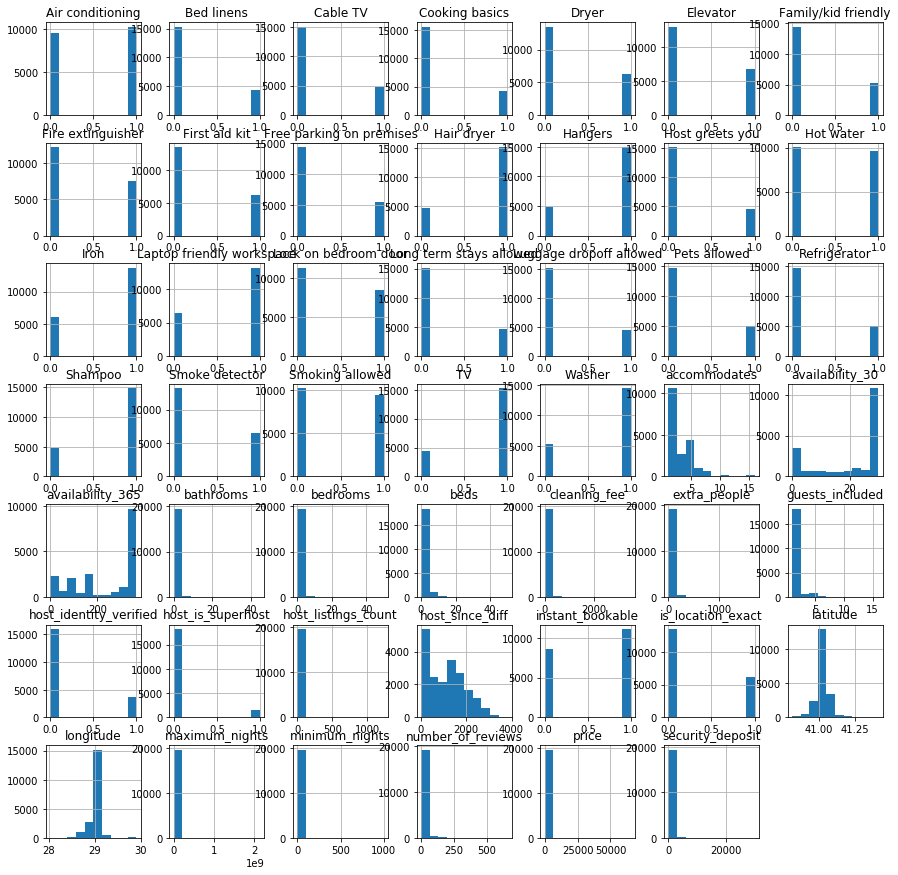

In [212]:
processed_listings.hist(figsize=(15,15))

Seems like some columns mostly have same values.

In [224]:
drop_cols = ['host_is_superhost','host_identity_verified']
processed_listings.drop(drop_cols,axis=1,inplace=True)

numerical_columns = list(set(numerical_columns) - set(drop_cols))


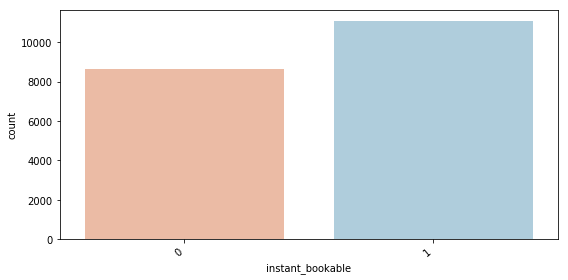

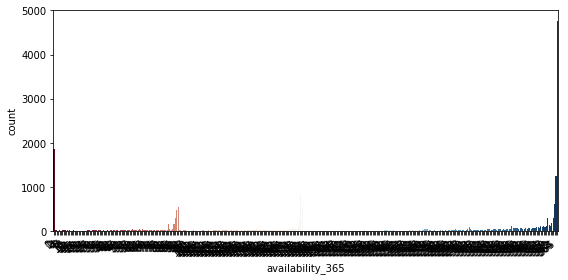

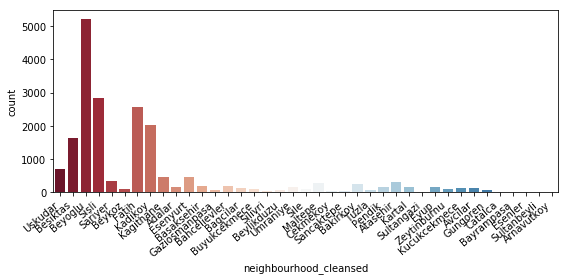

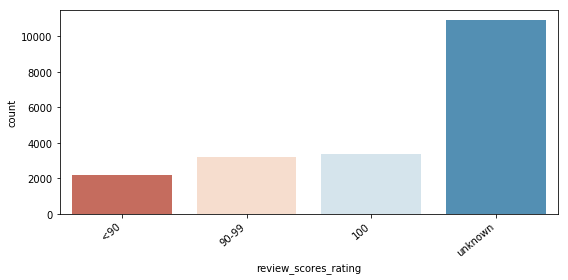

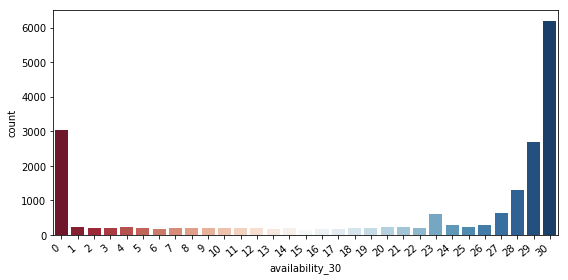

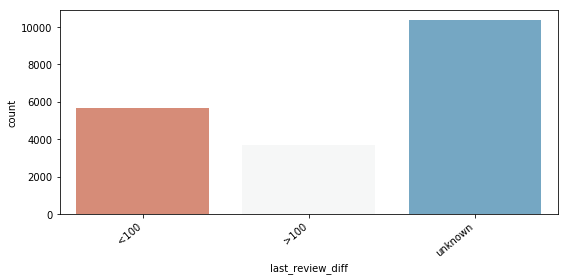

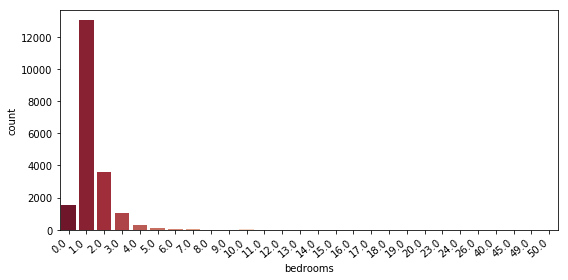

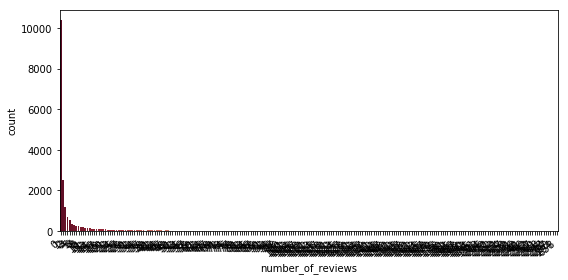

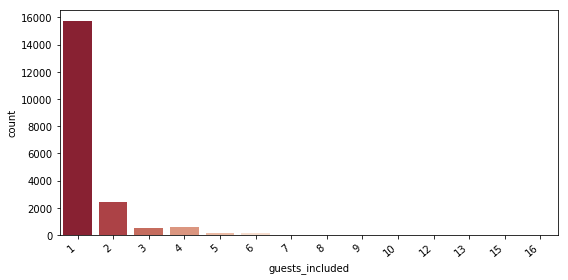

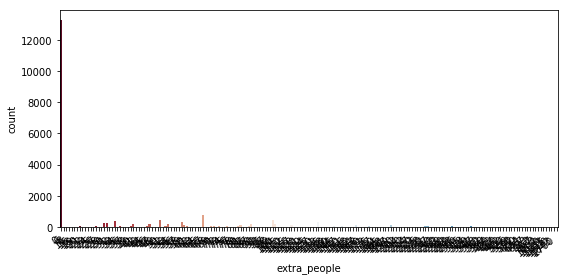

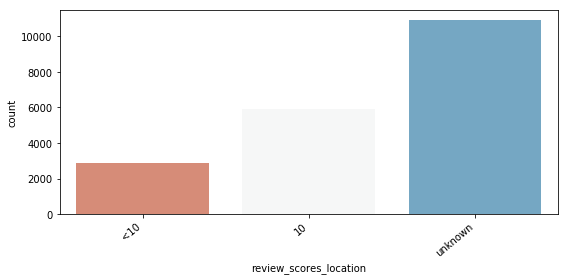

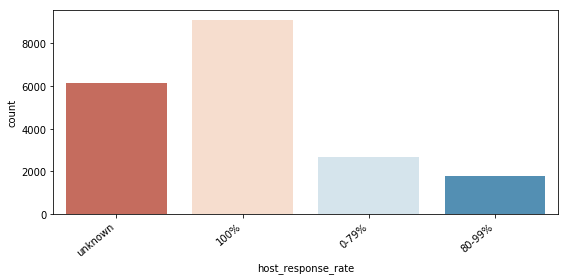

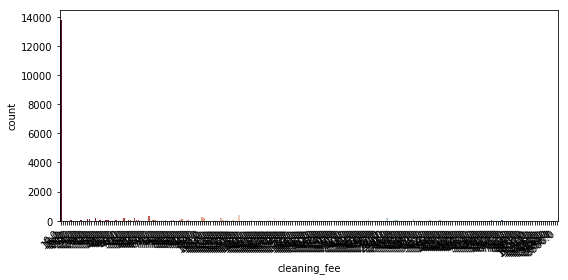

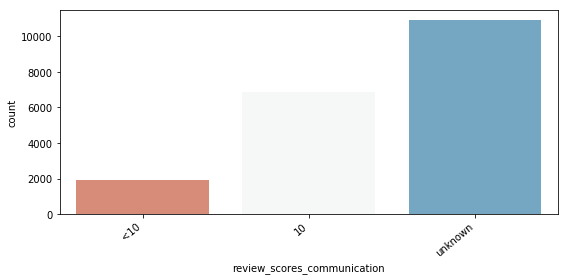

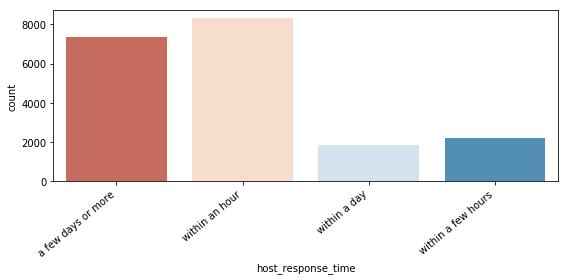

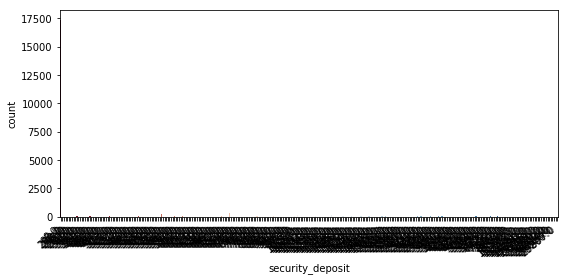

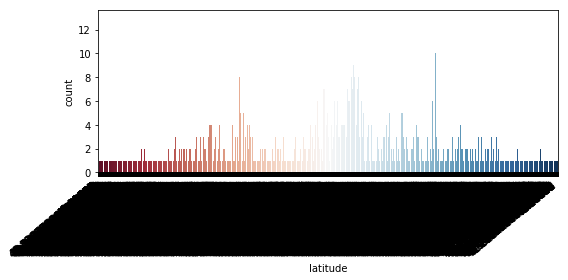

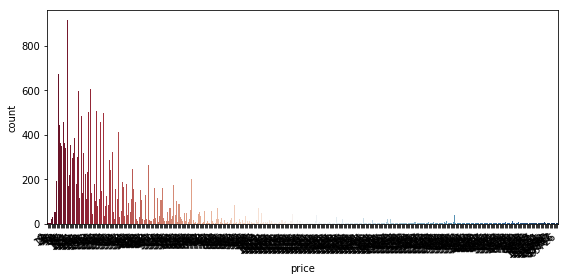

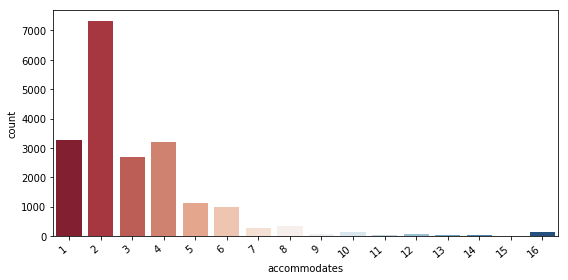

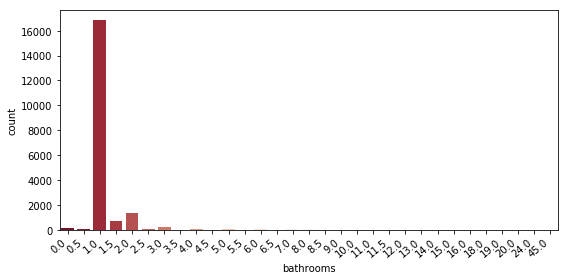

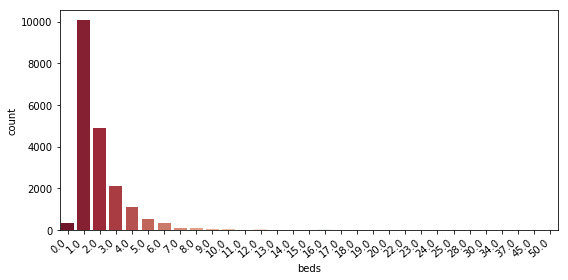

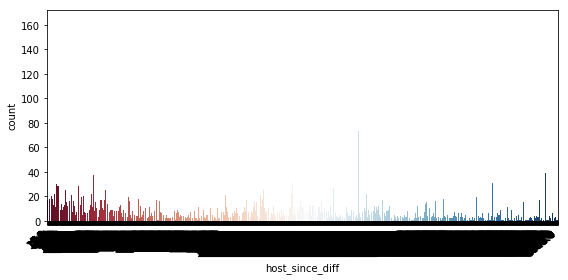

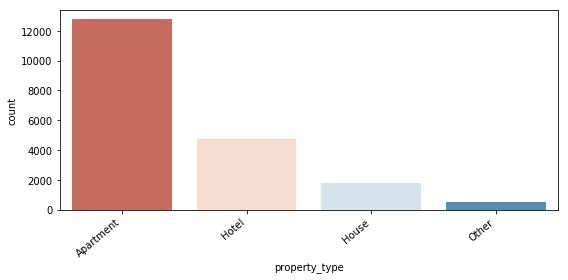

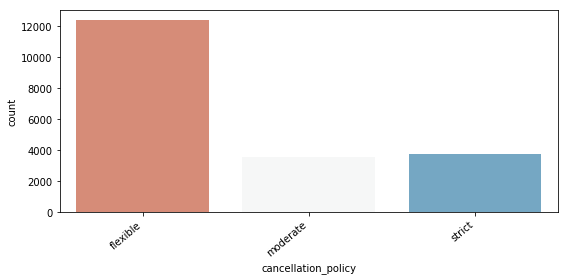

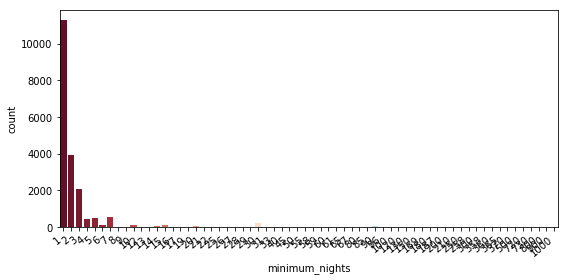

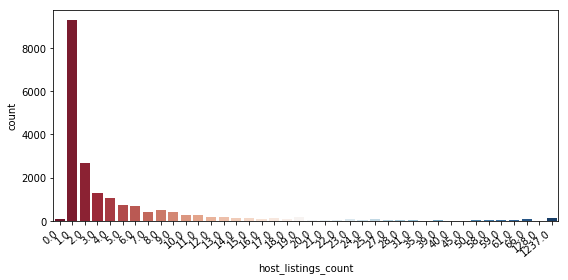

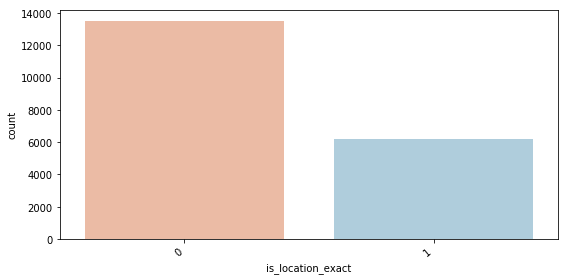

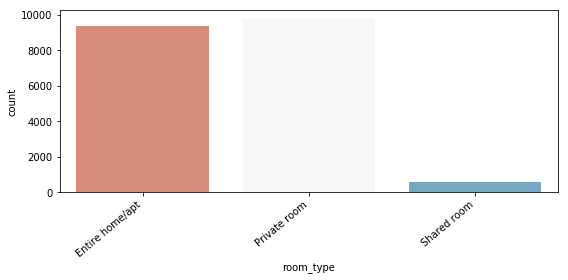

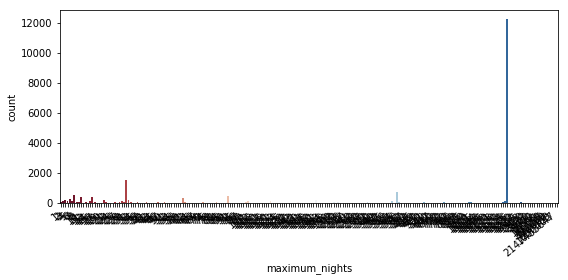

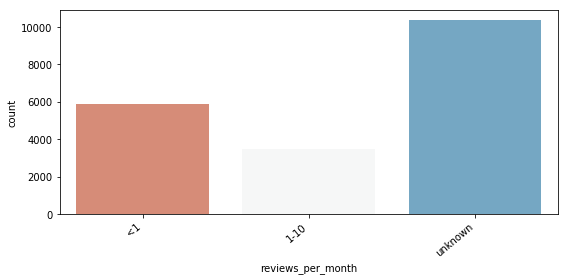

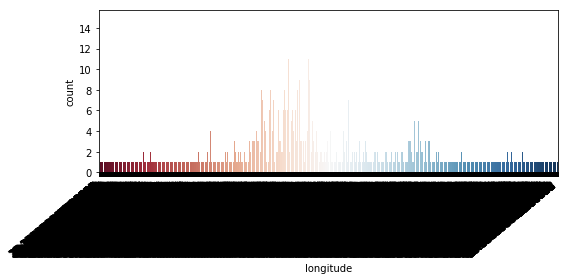

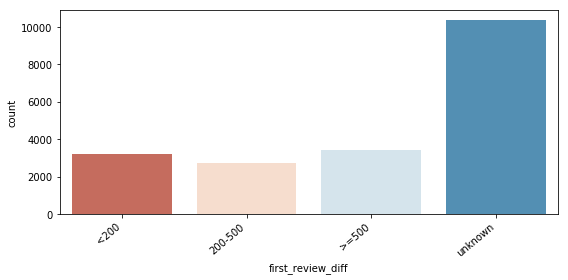

In [227]:
for column in numerical_columns:

    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=column, data=processed_listings, palette='RdBu')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    plt.tight_layout()
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126854f60>,
      dtype=object)

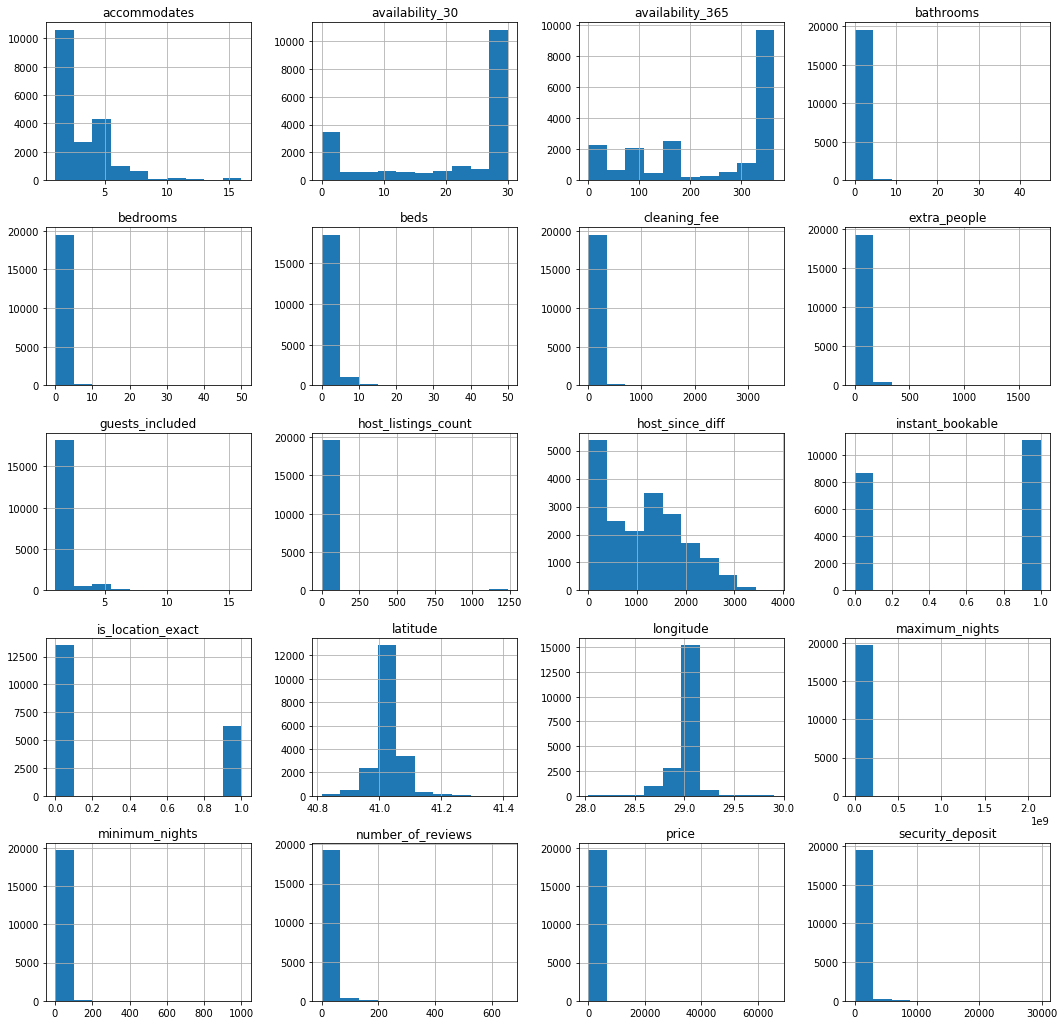

In [225]:
processed_listings[numerical_columns].hist(figsize=(18,18))

Our target variable `price` seems to have outlier values.

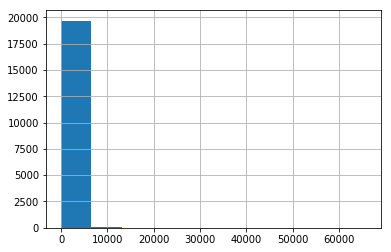

In [228]:
processed_listings.price.hist()

In [229]:
processed_listings.price.describe()

count    19727.000000
mean       377.366706
std       1291.115797
min          0.000000
25%        116.000000
50%        208.000000
75%        381.000000
max      65726.000000
Name: price, dtype: float64

In [244]:
len(processed_listings[processed_listings.price > 3000]) / processed_listings.shape[0]

0.009276625944137477

Safely we can remove the items having more then 1000 according to interquantile range calculation. But, just to loose less data, I'm gonna try threshold as 3000.


In [245]:
processed_listings = processed_listings[processed_listings.price <= 3000]

In [246]:
cleaned_data = processed_listings.copy()

From the above histograms, there are many skewed distributions. For these columns log transformation might help to the algorithm success.

In [249]:
# log_columns = ['accommodates','bathrooms','bedrooms','beds','cleaning_fee','extra_people','guests_included','host_listings_count','maximum_nights','minimum_nights','number_of_reviews','price','security_deposit']
log_columns = ['cleaning_fee','extra_people','price','security_deposit']

for column in log_columns:
    cleaned_data[column] = cleaned_data[column].astype('float64').replace(0.0, 0.01)
    cleaned_data[column] = np.log(cleaned_data[column])
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13587a3c8>,
      dtype=object)

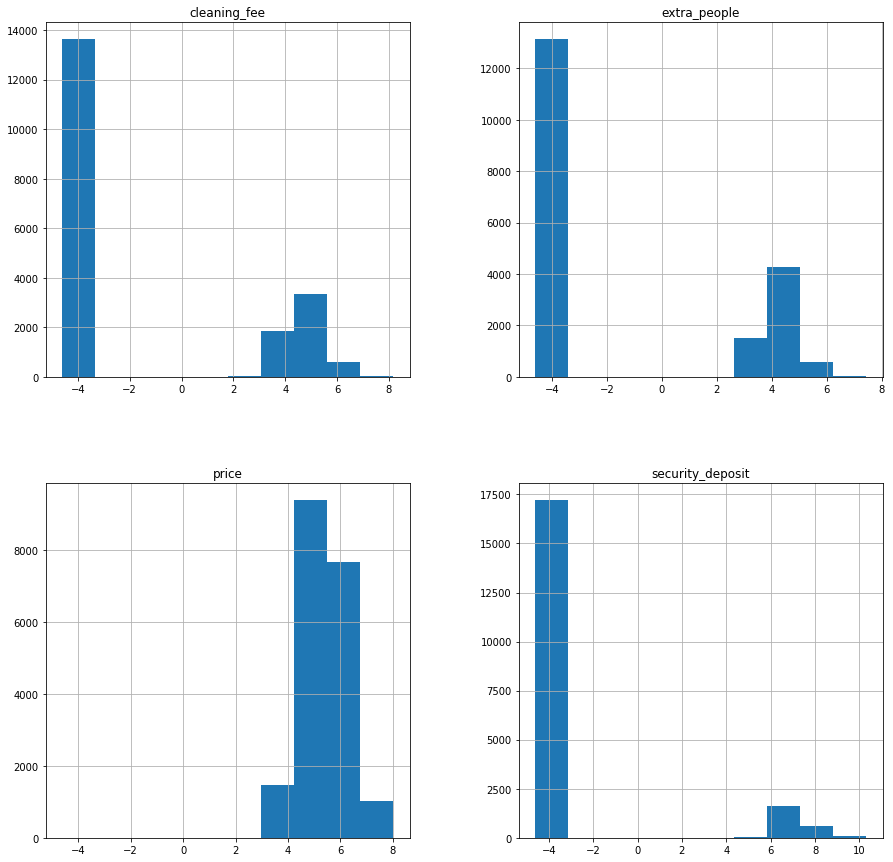

In [250]:
cleaned_data[log_columns].hist(figsize=(10,10))

One of the questions is related to the relationship between neightborhood and price. Let's visualize this relationship.

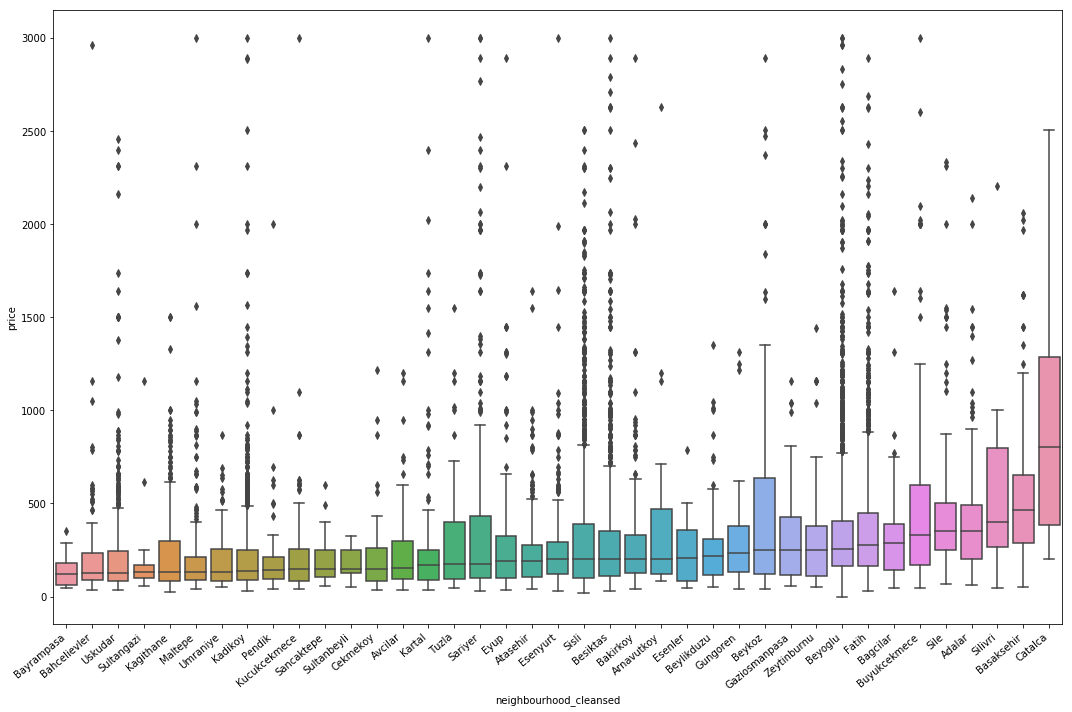

In [275]:
sorted_nb = processed_listings.groupby(['neighbourhood_cleansed'])['price'].median().sort_values()
plt.figure(figsize=(15,10))
ax = sns.boxplot(x=processed_listings['neighbourhood_cleansed'], y=processed_listings['price'], order=list(sorted_nb.index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()



## Data Modeling

Now, we are ready to build our model. Let's check our data shape first.

In [251]:
cleaned_data.shape

(19544, 58)

Since we are going to predict price, `price` is our target field and the rest of them are the features.

In [252]:
features = cleaned_data.drop('price',axis=1)
y = cleaned_data['price']

Scaling plays a crucial role on success of the algorithms since numerical values do not lie within the same range always. So, let's do scaling on the data.

In [253]:
scaler = StandardScaler()
numerical_columns = features.columns[(features.dtypes != 'object') & (features.dtypes != 'category')]
features[numerical_columns] = scaler.fit_transform(features[numerical_columns])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


For multi categorical columns, `get_dummies` method can handle them to convert into the numerical values.


In [254]:
dummied_items = pd.get_dummies(features,dummy_na=True)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(dummied_items,y,test_size=0.30,random_state=0)

To predict price we need a regression algorithm, and there are several implementations in scikit-learn. We can try out different ones and choose the most successful one.

In [258]:
svr = SVR()

svr.fit(X_train, y_train)
print('Training score: ', svr.score(X_train, y_train))
y_preds = svr.predict(X_test)
print('Validation score: ', r2_score(y_test,y_preds))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score:  0.652560150829885
Validation score:  0.5757929126122763


In [259]:
svr_poly = SVR(kernel='poly')

svr_poly.fit(X_train, y_train)
print('Training score: ', svr_poly.score(X_train, y_train))
y_preds = svr_poly.predict(X_test)
print('Validation score: ', r2_score(y_test,y_preds))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training score:  0.5808391261204304
Validation score:  0.4658558135376466


In [257]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
print('Training score: ', knn.score(X_train, y_train))
y_preds = knn.predict(X_test)
print('Validation score: ', r2_score(y_test,y_preds))

Training score:  0.6259476384536056
Validation score:  0.4144280811718354


In [256]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)
print('Training score: ', gbr.score(X_train, y_train))
y_preds = gbr.predict(X_test)
print('Validation score: ',r2_score(y_test,y_preds))

Training score:  0.606012441989247
Validation score:  0.5783302547331938


In [270]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (9,5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 12)
    plt.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show() 

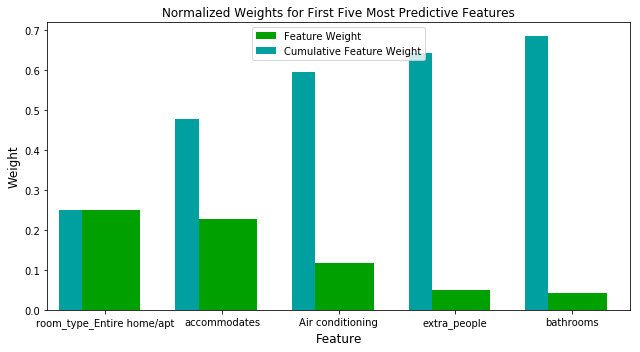

In [271]:
importances = gbr.feature_importances_
feature_plot(importances, X_train, y_train)

In [267]:
rfr = RandomForestRegressor(random_state=0, n_estimators=1000, min_samples_leaf=2)
rfr.fit(X_train, y_train)
print('Training score: ', rfr.score(X_train, y_train))
y_preds = rfr.predict(X_test)
print('Validation score: ', r2_score(y_test,y_preds))


Training score:  0.9154504415648187
Validation score:  0.5925189694459625


## Evaluate the Results

In [269]:
#TODO: Try with grid search
svr = SVR()

parameters = {}

scorer = make_scorer(r2_score)
grid_obj = GridSearchCV(svr, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

best_svr = grid_fit.best_estimator_
print(best_svr)

predictions = (svr.fit(X_train, y_train)).predict(X_test)
best_predictions = best_svr.predict(X_test)

print("\nOptimized Model\n------")
print("Final F-score on the testing data: {:.4f}".format(r2_score(y_test, best_predictions)))

As you can see in the above comparison, `SVR` seems to produce meaningful results. Random forest tree is overfitting. To improve this, we can add more feature preprocessing steps and maybe try tunning hyperparameters for the algorithm.

TBC